In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import bambi as bmb

## Excercise 10.13

In [2]:
coffee_data = pd.read_csv("coffee_ratings.csv")

In [4]:
coffee_data = coffee_data[["farm_name","total_cup_points",'aroma', 'aftertaste' ]]

In [5]:
coffee_data.head()

,farm_name,total_cup_points,aroma,aftertaste
0,metad plc,90.58,8.67,8.67
1,metad plc,89.92,8.75,8.50
2,"san marcos barrancas ""san cristobal cuch",89.75,8.42,8.42
3,yidnekachew dabessa coffee plantation,89.00,8.17,8.42
4,metad plc,88.83,8.25,8.25


Because these are not independant samples , for this exercise we just look at one sample per farm name

In [8]:
new_coffee= coffee_data.groupby('farm_name').sample().reset_index(drop=True)

## Exercise 10.14
Model new_coffee rating by its aroma

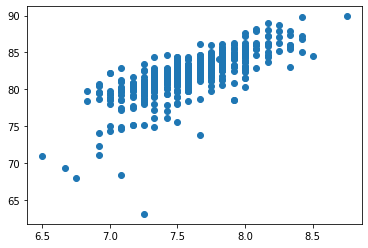

In [9]:
plt.scatter(new_coffee.aroma, new_coffee.total_cup_points)

Looks like a linear model would be *useful*

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, aroma, total_cup_points_sigma]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 27 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,32.798,1.894,29.177,36.313,0.008,0.005,60259.0,31911.0,1.0
aroma,6.503,0.250,6.028,6.969,0.001,0.001,60150.0,32266.0,1.0
total_cup_points_sigma,1.869,0.056,1.764,1.973,0.000,0.000,58199.0,30547.0,1.0


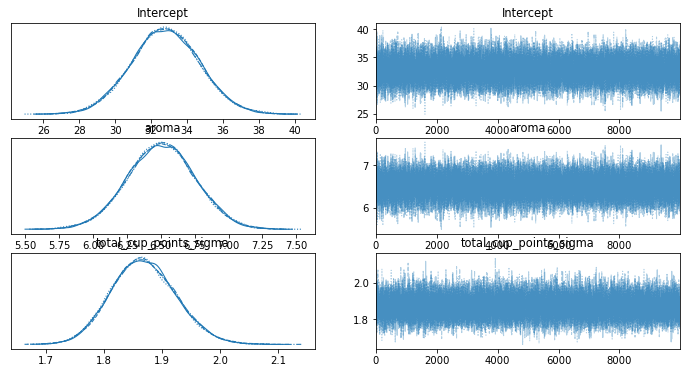

In [10]:
model = bmb.Model('total_cup_points ~ aroma', new_coffee)
results = model.fit(draws=10000, chains=4)
az.plot_trace(results)
az.summary(results)

array([<AxesSubplot:title={'center':'Intercept'}>,
       <AxesSubplot:title={'center':'aroma'}>,
       <AxesSubplot:title={'center':'total_cup_points_sigma'}>],
      dtype=object)

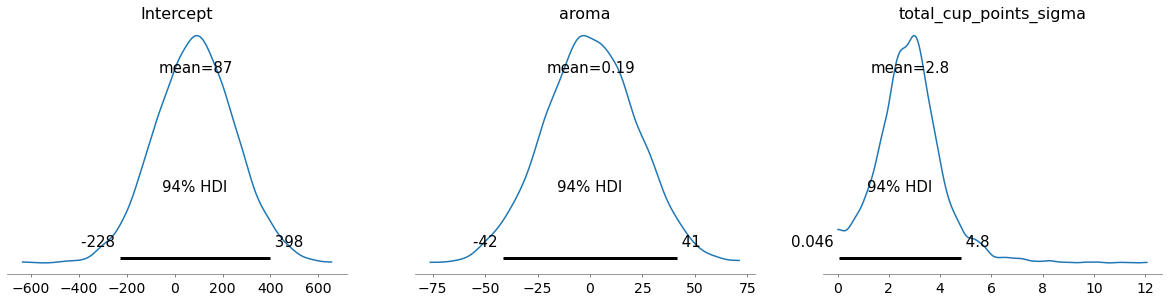

In [12]:
model.plot_priors()

* The priors seem weak informative, although maybe sigma could be a bit weaker? 
* There is strong evidence of a positive relationship between aroma and total_cup_points, for example none of the samples of the slope are less then 5!

In [24]:
np.sum(results.posterior.aroma.values.flatten() <5)

0